# Illustration of the ~2/3 bootstrap sampling rule

Estimated fraction of unique elements in a bootstrap sample: 0.6321


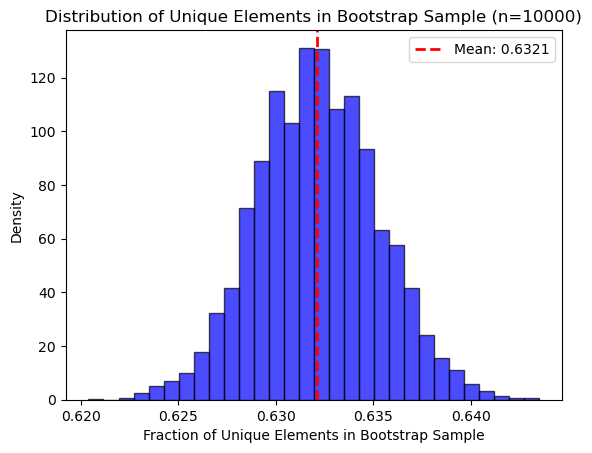

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to estimate the proportion of unique elements in a bootstrap sample


# Run simulation
n = 
mean_unique_fraction, unique_fractions = 

# Print the estimated fraction of unique elements
print(f"Estimated fraction of unique elements in a bootstrap sample: {mean_unique_fraction:.4f}")

# Plot the distribution of unique element fractions
plt.hist(unique_fractions, bins=30, density=True, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_unique_fraction, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_unique_fraction:.4f}")
plt.xlabel("Fraction of Unique Elements in Bootstrap Sample")
plt.ylabel("Density")
plt.title(f"Distribution of Unique Elements in Bootstrap Sample (n={n})")
plt.legend()
plt.show()


# Decision tree vs. bagging on synthetic "moon" data

Decision Tree Accuracy: 0.853
Bagging Accuracy: 0.900


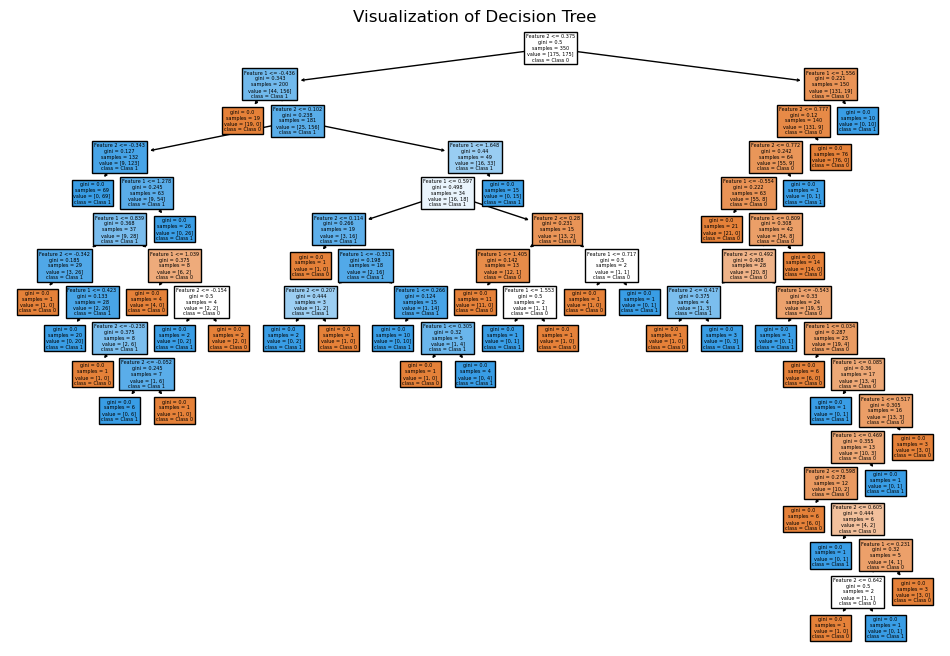

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Generate a toy dataset
X, y = 

# Split into training and test sets
X_train, X_test, y_train, y_test = 

# Train a Single Decision Tree
tree = 
tree_preds = 

# Train a Bagging Ensemble of Decision Trees
bagging = 

bagging_preds = 

# Compare Accuracy
print()
print()
